<a href="https://colab.research.google.com/github/zendhiyb/prediksi-pendapatan/blob/main/Samsung_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [ ]:
import requests
import pandas as pd
import time

urls = [
    'https://www.lazada.co.id/samsung/?ajax=true&from=wangpu&isFirstRequest=true&langFlag=id&page=1&pageTypeId=2&q=All-Products',
    'https://www.lazada.co.id/samsung/?ajax=true&from=wangpu&langFlag=id&page=2&pageTypeId=2&q=All-Products',
    'https://www.lazada.co.id/samsung/?ajax=true&from=wangpu&langFlag=id&page=3&pageTypeId=2&q=All-Products',
    'https://www.lazada.co.id/samsung/?ajax=true&from=wangpu&langFlag=id&page=4&pageTypeId=2&q=All-Products',
    'https://www.lazada.co.id/samsung/?ajax=true&from=wangpu&langFlag=id&page=5&pageTypeId=2&q=All-Products',
    'https://www.lazada.co.id/samsung/?ajax=true&from=wangpu&langFlag=id&page=6&pageTypeId=2&q=All-Products',
]

produk_all = []

for url in urls:
    try:
        req = requests.get(url).json()
        rows = req['mods']['listItems']
        for i in range(len(rows)):
            nama_produk = rows[i].get('name', 'Tidak Tersedia')
            harga = rows[i].get('price', 'Tidak Tersedia')
            rating = rows[i].get('ratingScore', 0)
            review = rows[i].get('review', 0)
            terjual = rows[i].get('itemSoldCntShow', 0)
            produk_all.append((nama_produk, harga, terjual, review, rating))
        print(f"Sukses mendapatkan data dari {url}")
    except Exception as e:
        print(f"Gagal mengakses {url}. Error: {e}")
    time.sleep(3)
df = pd.DataFrame(produk_all, columns=['Nama Barang', 'Harga', 'Terjual', 'Review', 'Rating'])
df

Sukses mendapatkan data dari https://www.lazada.co.id/samsung/?ajax=true&from=wangpu&isFirstRequest=true&langFlag=id&page=1&pageTypeId=2&q=All-Products
Sukses mendapatkan data dari https://www.lazada.co.id/samsung/?ajax=true&from=wangpu&langFlag=id&page=2&pageTypeId=2&q=All-Products
Sukses mendapatkan data dari https://www.lazada.co.id/samsung/?ajax=true&from=wangpu&langFlag=id&page=3&pageTypeId=2&q=All-Products
Sukses mendapatkan data dari https://www.lazada.co.id/samsung/?ajax=true&from=wangpu&langFlag=id&page=4&pageTypeId=2&q=All-Products
Sukses mendapatkan data dari https://www.lazada.co.id/samsung/?ajax=true&from=wangpu&langFlag=id&page=5&pageTypeId=2&q=All-Products
Sukses mendapatkan data dari https://www.lazada.co.id/samsung/?ajax=true&from=wangpu&langFlag=id&page=6&pageTypeId=2&q=All-Products


,Nama Barang,Harga,Terjual,Review,Rating
0,Samsung Galaxy-A05s 6GB_128GB,1949000,30.4K sold,9965,4.931460110386352
1,Samsung 32 inch HD Smart TV T4501 dengan PurCo...,2099000,24.2K sold,6676,4.93274415817855
2,"Samsung HD TV 32 inch UA32T4001, Wide Colour E...",1599000,70.1K sold,14538,4.928325766955565
3,"Samsung AU7002 43 inch, Smart TV, Ultra HD 4K ...",3349000,9.7K sold,2258,4.939769707705935
4,Samsung Galaxy A06 4/64,1499000,1.2K sold,344,4.906976744186046
...,...,...,...,...,...
235,Samsung Alpha Inverter AC 1 PK - AR09AYHLAWKNSE,5699000,135 sold,17,4.764705882352941
236,"Samsung Smart TV 43"" Crystal UHD 4K DU8000 4K ...",4639000,0,2,4.5
237,"Galaxy A34 5G 8/256GB, Samsung A series, Layar...",3799000,3.9K sold,996,4.901606425702811
238,"Samsung AU7002 65 inch, Smart TV, Ultra HD 4K ...",7759000,0,26,4.423076923076923


In [ ]:
df.to_csv('dataset_samsung_lazada.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Tugas/MACHINE LEARNING/2/dataset/dataset_samsung_lazada.csv'

df = pd.read_csv(file_path)

def clean_terjual(value):
    try:
        if isinstance(value, str):
            value = value.replace('K', '').replace(' sold', '').strip()
            if '.' in value:
                value = float(value) * 1000
            else:
                value = int(value)
        elif isinstance(value, (int, float)):
            return int(value)
        return int(value)
    except (ValueError, AttributeError):
        return 0

df['Terjual'] = df['Terjual'].apply(clean_terjual)
df['Rating'] = df['Rating'].round(1)
df['Review'] = pd.to_numeric(df['Review'], errors='coerce').fillna(0).astype(int)
df

,Nama Barang,Harga,Terjual,Review,Rating
0,Samsung Galaxy-A05s 6GB_128GB,1949000,30400,9965,4.9
1,Samsung 32 inch HD Smart TV T4501 dengan PurCo...,2099000,24200,6676,4.9
2,"Samsung HD TV 32 inch UA32T4001, Wide Colour E...",1599000,70100,14538,4.9
3,"Samsung AU7002 43 inch, Smart TV, Ultra HD 4K ...",3349000,9700,2258,4.9
4,Samsung Galaxy A06 4/64,1499000,1200,344,4.9
...,...,...,...,...,...
235,Samsung Alpha Inverter AC 1 PK - AR09AYHLAWKNSE,5699000,135,17,4.8
236,"Samsung Smart TV 43"" Crystal UHD 4K DU8000 4K ...",4639000,0,2,4.5
237,"Galaxy A34 5G 8/256GB, Samsung A series, Layar...",3799000,3900,996,4.9
238,"Samsung AU7002 65 inch, Smart TV, Ultra HD 4K ...",7759000,0,26,4.4


In [ ]:
df = df.drop_duplicates(subset='Nama Barang', keep='first')
df

,Nama Barang,Harga,Terjual,Review,Rating
0,Samsung Galaxy-A05s 6GB_128GB,1949000,30400,9965,4.9
1,Samsung 32 inch HD Smart TV T4501 dengan PurCo...,2099000,24200,6676,4.9
2,"Samsung HD TV 32 inch UA32T4001, Wide Colour E...",1599000,70100,14538,4.9
3,"Samsung AU7002 43 inch, Smart TV, Ultra HD 4K ...",3349000,9700,2258,4.9
4,Samsung Galaxy A06 4/64,1499000,1200,344,4.9
...,...,...,...,...,...
191,Samsung Flip6 Silicone Case,689000,25,1,5.0
197,Samsung S24 Clear Gadget Case,449000,44,0,0.0
198,Samsung S24+ Clear Gadget Case,449000,0,0,0.0
236,"Samsung Smart TV 43"" Crystal UHD 4K DU8000 4K ...",4639000,0,2,4.5


In [ ]:
df.dtypes

,0
Nama Barang,object
Harga,int64
Terjual,int64
Review,int64
Rating,float64


In [ ]:
output_path = '/content/drive/MyDrive/Tugas/MACHINE LEARNING/2/dataset/cleaned_dataset_samsung_lazada.csv'
df.to_csv(output_path, index=False)

output_path

'/content/drive/MyDrive/Tugas/MACHINE LEARNING/2/dataset/cleaned_dataset_samsung_lazada.csv'

In [ ]:
df['Terjual'] = df['Terjual'].apply(clean_terjual)
df['Harga'] = pd.to_numeric(df['Harga'], errors='coerce')
df['Penghasilan'] = df['Terjual'] * df['Harga']

total_penghasilan = df['Penghasilan'].sum()
total_penghasilan_rupiah = f"Rp {total_penghasilan:,.0f}"
rincian_penghasilan = df[['Nama Barang', 'Terjual', 'Harga', 'Penghasilan']]
pengujian = df[['Terjual', 'Harga', 'Penghasilan']]

rincian_penghasilan

<ipython-input-7-6cabff919f58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Terjual'] = df['Terjual'].apply(clean_terjual)
<ipython-input-7-6cabff919f58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Harga'] = pd.to_numeric(df['Harga'], errors='coerce')
<ipython-input-7-6cabff919f58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,Nama Barang,Terjual,Harga,Penghasilan
0,Samsung Galaxy-A05s 6GB_128GB,30400,1949000,59249600000
1,Samsung 32 inch HD Smart TV T4501 dengan PurCo...,24200,2099000,50795800000
2,"Samsung HD TV 32 inch UA32T4001, Wide Colour E...",70100,1599000,112089900000
3,"Samsung AU7002 43 inch, Smart TV, Ultra HD 4K ...",9700,3349000,32485300000
4,Samsung Galaxy A06 4/64,1200,1499000,1798800000
...,...,...,...,...
191,Samsung Flip6 Silicone Case,25,689000,17225000
197,Samsung S24 Clear Gadget Case,44,449000,19756000
198,Samsung S24+ Clear Gadget Case,0,449000,0
236,"Samsung Smart TV 43"" Crystal UHD 4K DU8000 4K ...",0,4639000,0


In [ ]:
total_penghasilan_rupiah

'Rp 511,507,318,000'

In [ ]:
top_10_penghasilan = df[['Nama Barang', 'Terjual', 'Harga', 'Penghasilan']].sort_values(by='Penghasilan', ascending=False).head(10)

top_10_penghasilan

,Nama Barang,Terjual,Harga,Penghasilan
2,"Samsung HD TV 32 inch UA32T4001, Wide Colour E...",70100,1599000,112089900000
0,Samsung Galaxy-A05s 6GB_128GB,30400,1949000,59249600000
1,Samsung 32 inch HD Smart TV T4501 dengan PurCo...,24200,2099000,50795800000
15,Samsung Mesin Cuci Top Loading 7Kg dengan Wobb...,16500,2299000,37933500000
3,"Samsung AU7002 43 inch, Smart TV, Ultra HD 4K ...",9700,3349000,32485300000
36,"Galaxy A54 5G 8/256GB, Samsung A series, Night...",6000,4799000,28794000000
13,Samsung Mesin Cuci Top Loading 8Kg dengan Wobb...,9600,2449000,23510400000
18,Samsung Galaxy A15 5G - 8/256GB,5000,3599000,17995000000
20,"Galaxy A34 5G 8/256GB, Samsung A series, Layar...",3900,3799000,14816100000
32,Samsung Kulkas 2 Pintu 203L dengan Anti-Bacter...,3800,3599000,13676200000


In [ ]:
pengujian

,Terjual,Harga,Penghasilan
0,30400,1949000,59249600000
1,24200,2099000,50795800000
2,70100,1599000,112089900000
3,9700,3349000,32485300000
4,1200,1499000,1798800000
...,...,...,...
191,25,689000,17225000
197,44,449000,19756000
198,0,449000,0
236,0,4639000,0


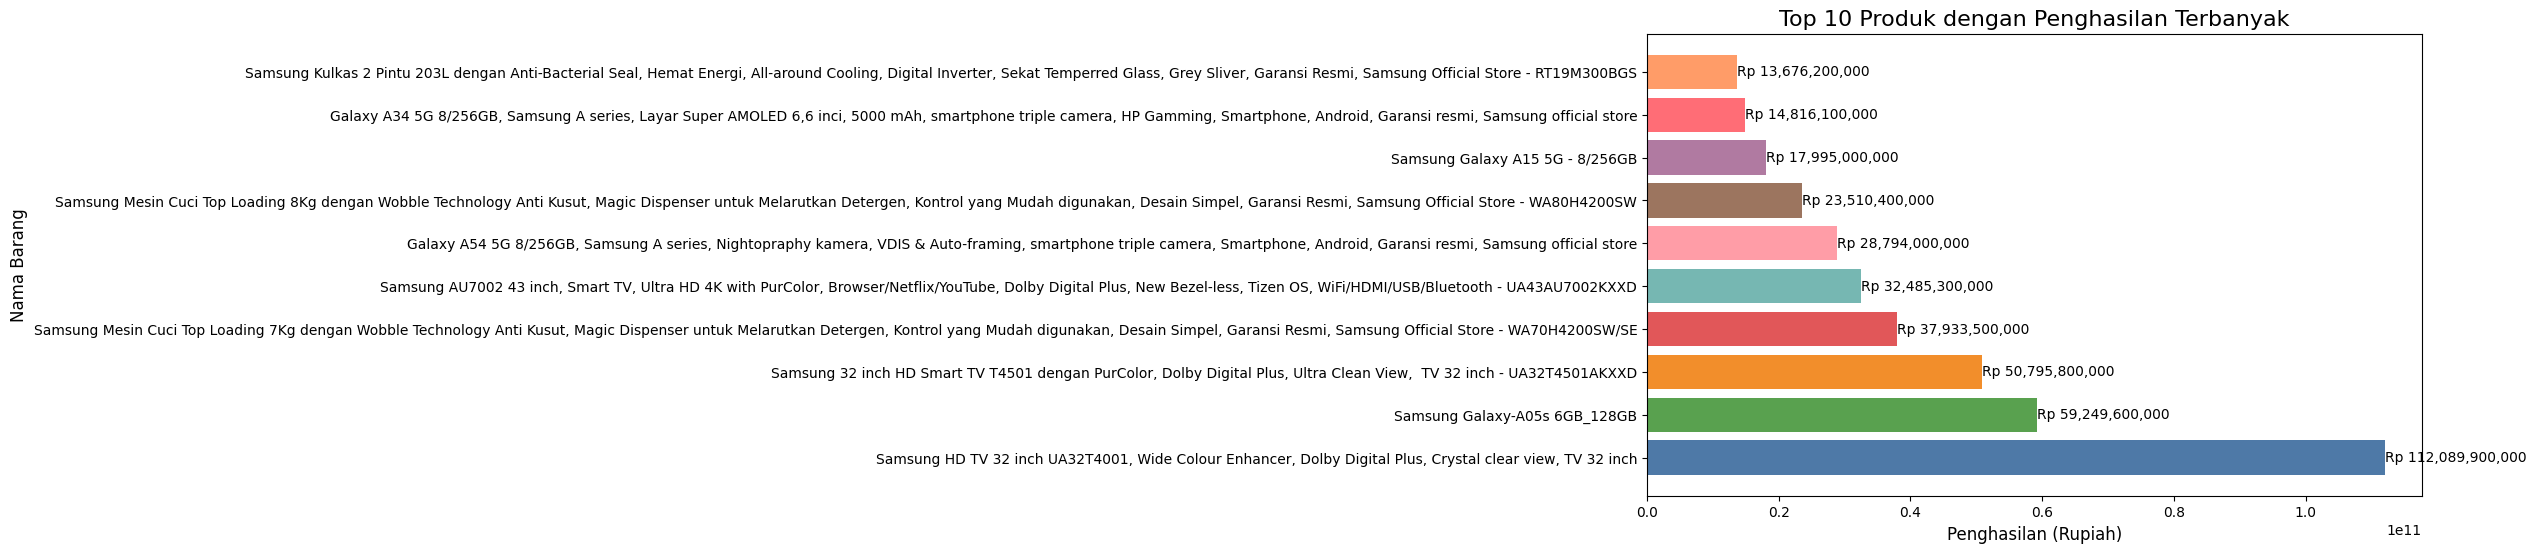

In [ ]:
import matplotlib.pyplot as plt

top_10_penghasilan = df[['Nama Barang', 'Terjual', 'Harga', 'Penghasilan']].sort_values(by='Penghasilan', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_penghasilan['Nama Barang'], top_10_penghasilan['Penghasilan'],
         color=['#4E79A7', '#59A14F', '#F28E2B', '#E15759', '#76B7B2',
                '#FF9DA7', '#9C755F', '#B07AA1', '#FF6D76', '#FF9C68'])

plt.title('Top 10 Produk dengan Penghasilan Terbanyak', fontsize=16)
plt.xlabel('Penghasilan (Rupiah)', fontsize=12)
plt.ylabel('Nama Barang', fontsize=12)

for index, value in enumerate(top_10_penghasilan['Penghasilan']):
    plt.text(value, index, f'Rp {value:,.0f}', va='center', fontsize=10, color='black')

plt.show()


In [ ]:
X = pengujian.drop('Penghasilan', axis=1)  # Fitur
y = pengujian['Penghasilan']               # Target

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X, y = make_regression(n_samples=100, n_features=1, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

parameters = [
    {"n_estimators": 10, "max_depth": 5},
    {"n_estimators": 50, "max_depth": 10},
    {"n_estimators": 100, "max_depth": 15},
    {"n_estimators": 200, "max_depth": None},
]

results = []
for param in parameters:
    model = RandomForestRegressor(n_estimators=param['n_estimators'], max_depth=param['max_depth'], random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        "n_estimators": param['n_estimators'],
        "max_depth": param['max_depth'],
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "R^2 Score": r2
    })

df_results = pd.DataFrame(results)
df_results

,n_estimators,max_depth,Mean Absolute Error,Mean Squared Error,R^2 Score
0,10,5.0,1.902587,5.624606,0.997768
1,50,10.0,1.217804,2.175895,0.999137
2,100,15.0,1.186352,2.139808,0.999151
3,200,NaN,1.147474,2.069946,0.999179


In [ ]:
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)

cv_results = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
-cv_results.mean()


12.299738219047248